In [1]:
import numpy as np
import pandas as pd
import cryptocompare as cc
from fredapi import Fred
from fredapi import Fred
import time
from datetime import date
import matplotlib.pyplot as plt

In [33]:
TODAY = str(date.today())

In [34]:
#Collecting a list of cryptocurrencies
coin_list = cc.get_coin_list()
coins = sorted(list(coin_list.keys()))

In [35]:
coin_data = {}
for i in range(len(coins)//50 + 1):
    coins_to_get = coins[(50*i):(50*i+50)]
    message = cc.get_price(coins_to_get, 'USD', full=True)
    coin_data.update(message['RAW'])

In [36]:
#Retrieving Bitcoin data
hist = cc.get_historical_price_day('BTC', 'USD', limit=90)

In [37]:
#Removing all columns apart from the closing price
closes = pd.DataFrame(hist)
BTCclose = closes.drop(['high', 'low', 'open', 'volumeto', 'conversionType', 'conversionSymbol', 'volumefrom'], axis = 1)

BTCclose


,time,close
0,1642809600,35075.92
1,1642896000,36288.15
2,1642982400,36702.79
3,1643068800,36975.99
4,1643155200,36829.37
...,...,...
86,1650240000,40811.03
87,1650326400,41504.44
88,1650412800,41375.35
89,1650499200,40490.97


In [38]:
#Formatting the data
BTCclose['time'] = pd.to_datetime(BTCclose['time'],unit='s')

BTCclose.set_index('time', inplace=True)
y = BTCclose['close']
y

time
2022-01-22    35075.92
2022-01-23    36288.15
2022-01-24    36702.79
2022-01-25    36975.99
2022-01-26    36829.37
                ...   
2022-04-18    40811.03
2022-04-19    41504.44
2022-04-20    41375.35
2022-04-21    40490.97
2022-04-22    40523.41
Name: close, Length: 91, dtype: float64

In [24]:
#Retrieving Ethereum data from FRED
fred = Fred(api_key='cfd92b6c9dd2083fd91635701acc6d9c')
ETH = fred.get_series('CBETHUSD')
ETH2 = ETH.last('91D')
ETHpd = pd.DataFrame(ETH2)
ETHpd.columns = ['Close price']

x = ETHpd['Close price']
x


2022-01-21    2579.94
2022-01-22    2410.82
2022-01-23    2536.65
2022-01-24    2438.98
2022-01-25    2457.06
               ...   
2022-04-17    2987.16
2022-04-18    3057.72
2022-04-19    3098.58
2022-04-20    3075.06
2022-04-21    2984.26
Name: Close price, Length: 91, dtype: float64

Text(0, 0.5, 'y - $')

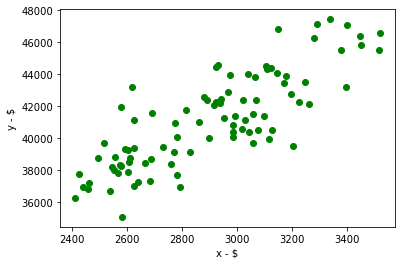

In [25]:
#Plotting Bitcoin price against Ethereum
plt.plot(x, y, 'go')
plt.xlabel("x - $")
plt.ylabel("y - $")

In [26]:
#Creating Numpy arrays
y1 = y.to_numpy()
x1 = x.to_numpy()
type(x)

pandas.core.series.Series

In [27]:
#Using OLS equation to find Alpha and Beta
beta = ((np.multiply(y1, x1)).mean()-np.mean(x1)*np.mean(y1))/((np.multiply(x1, x1)).mean()-np.mean(x1)*np.mean(x1))
alpha =np.mean(y1)-beta*np.mean(x1)
print("alpha =",alpha, "\nbeta =",beta)

alpha = 16968.541993236988 
beta = 8.330515483831107


In [28]:
#Using gradient descent to find Alpha and Beta
y_hat = alpha + np.multiply(beta,x1)
L = np.sum(np.multiply(y1 - y_hat,y1 - y_hat))
L

256395951.7653837

In [29]:
def  cal_cost(beta0,beta1,x1,y1):
        n = len(y1)
        predictions = beta0 + np.multiply(beta1,x1)
        cost = (1/2*n) * np.sum(np.square(predictions-y1))
        return cost


In [30]:
iterations = 500
learningrate = 0.01
beta0 = -11
beta1 = 0
n = len(y1)
index = np.arange(1, iterations+1, 1).reshape((iterations, 1))

loss_history = np.zeros((iterations,1))
beta0_history = np.zeros((iterations,1))
beta1_history = np.zeros((iterations,1))

for i in range(iterations):
       
        prediction = beta0 + np.multiply(beta1,x1)
        residuals = y1-prediction
        residuals_sum = sum(residuals)
        beta0_gradient = -(1/n)*residuals_sum*(learningrate)
        beta0 = beta0 - beta0_gradient
        beta0_history[i] = beta0
    
        residuals_x = np.multiply(residuals,x1)
        residuals_x_sum = sum(residuals_x)
        beta1_gradient = -(1/n)*residuals_x_sum*(learningrate)
        beta1 = beta1 - beta1_gradient
        beta1_history[i] = beta1
    
        loss_history[i] = cal_cost(beta0,beta1,x1,y1)

/var/folders/nf/23b4jcnd4mg5_625zz18w6wr0000gn/T/ipykernel_76642/621532296.py:4: RuntimeWarning: overflow encountered in double_scalars
  cost = (1/2*n) * np.sum(np.square(predictions-y1))
/var/folders/nf/23b4jcnd4mg5_625zz18w6wr0000gn/T/ipykernel_76642/621532296.py:4: RuntimeWarning: overflow encountered in square
  cost = (1/2*n) * np.sum(np.square(predictions-y1))
/var/folders/nf/23b4jcnd4mg5_625zz18w6wr0000gn/T/ipykernel_76642/1304892046.py:21: RuntimeWarning: overflow encountered in multiply
  residuals_x = np.multiply(residuals,x1)
/var/folders/nf/23b4jcnd4mg5_625zz18w6wr0000gn/T/ipykernel_76642/1304892046.py:24: RuntimeWarning: invalid value encountered in double_scalars
  beta1 = beta1 - beta1_gradient
